<a href="https://colab.research.google.com/github/AnamayaSaraogi/Eczema-detection/blob/main/Eczema_CNN_Model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To build a CNN Model from scratch that classifies images as eczema or non-eczema.
The model is approx 60% accurate.


# Load dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define dataset path
dataset_path = "/content/drive/MyDrive/eczema_dataset_2"

# Check if the dataset path exists
if os.path.exists(dataset_path):
    print(" Dataset found!")
else:
    print(" Dataset path is incorrect. Please check the path.")

# Check number of images in each class
categories = ["Eczema", "Not Eczema"]
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.exists(category_path):
        num_images = len(os.listdir(category_path))
        print(f" {category}: {num_images} images")
    else:
        print(f" {category} folder not found!")


 Dataset found!
 Eczema: 1097 images
 Not Eczema: 1099 images


# Load Images and preprocess them

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16  # Reduce batch size for faster training

# Define the same ImageDataGenerator for both training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% data for validation
)

# Load training data (80% of dataset)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset="training"  # Training set
)

# Load validation data (20% of dataset)
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset="validation"  # Validation set
)


Found 1752 images belonging to 2 classes.
Found 438 images belonging to 2 classes.


# Model creation and training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification (Eczema vs Non-Eczema)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Reduce LR from 0.001 to 0.0005
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Print summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265,729 (73.49 MB)

 Trainable params: 19,264,769 (73.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)



Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 474s 4s/step - accuracy: 0.6361 - loss: 5.4271 - val_accuracy: 0.5434 - val_loss: 0.8803 - learning_rate: 5.0000e-04
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 460s 4s/step - accuracy: 0.6457 - loss: 2.6596 - val_accuracy: 0.5000 - val_loss: 6.4007 - learning_rate: 5.0000e-04
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 462s 4s/step - accuracy: 0.6552 - loss: 1.3325 - val_accuracy: 0.5000 - val_loss: 2.3563 - learning_rate: 5.0000e-04
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7153 - loss: 0.7475
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
110/110 ━━━━━━━━━━━━━━━━━━━━ 450s 4s/step - accuracy: 0.7153 - loss: 0.7471 - val_accuracy: 0.5023 - val_loss: 0.9886 - learning_rate: 5.0000e-04
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step - accuracy: 0.7699 - loss: 0.5626 - val_accuracy: 0.5525 - val_loss: 0.7814 - learning_rate: 1.0000e-04
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 462s 4s/step - accuracy:

saving the model to google drive

In [ ]:
model.save("/content/drive/MyDrive/eczema_classifier.keras")
print("Model saved successfully!")


Model saved successfully!


# Testing the model (single images as well as recursively from a folder)


Saving eczema.22_0e0a09b72a9b435883f3c03f496f51a4.jpg to eczema.22_0e0a09b72a9b435883f3c03f496f51a4 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


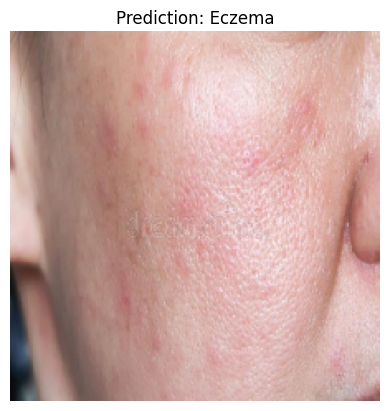

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Load the saved model
model_path = "/content/drive/MyDrive/eczema_classifier.keras"
model = load_model(model_path)

# Function to predict eczema or non-eczema
def predict_uploaded_image():
    # Let user upload an image
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    result = "Eczema" if prediction[0][0] > 0.5 else "Non-Eczema"

    # Display image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {result}")
    plt.show()

# Call function to upload and predict
predict_uploaded_image()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the saved model
model_path = "/content/drive/MyDrive/eczema_classifier.keras"
model = load_model(model_path)

# Path to the folder with unseen images
folder_path = "/content/drive/MyDrive/Eczemaa"

# Function to make predictions
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    result = "Eczema" if prediction[0][0] > 0.5 else "Non-Eczema"
    return result

# Recursively scan folder for images
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(root, file)
            result = predict_image(img_path, model)
            print(f"Image: {file} --> Prediction: {result}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Image: 03Eczema0915_9d04a5f2cabc4ab08af671bf2ccd9351.jpg --> Prediction: Non-Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image: eczema-lids-5_0dc020b942074e659ef800ada7a03006.jpg --> Prediction: Non-Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: eczem44_2e95eedeb7f74755a9b8b613cfdc1282.jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Image: eczema.13_8d11c92b25d6402e9eb54067d8d1a81a.jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Image: eczema-acute-21_69e677da86464794b65ac8c91dddd12e.jpg --> Prediction: Non-Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Image: eczema27_cc45aa9a35094cd2a7f417f04870894d.jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Image: eczema.11_3cf9cb8b7afe47adb47fb625c83d6544.jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Image

# Fixing

Since the accuracy is not that great, we will try some methods to get more accurate results. Firstly we will just try to see which images are being missclassified and whether they have a specific pattern that could be the reason for missclassification e.g. blurred, unlcear images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import shutil
from google.colab import files

# Load the saved model
model = tf.keras.models.load_model('/content/eczema_classifier.keras')  # Adjust path if needed

# Define the directory containing unseen images
unseen_images_dir = "/content/drive/MyDrive/Eczemaa"  # Adjust path if needed
misclassified_dir = "/content/misclassified"

# Ensure output directory for misclassified images exists
if not os.path.exists(misclassified_dir):
    os.makedirs(misclassified_dir)

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Track counts
total_images = 0
correct_predictions = 0
incorrect_predictions = 0

# List all images in unseen images directory
image_files = [f for f in os.listdir(unseen_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for img_name in image_files:
    img_path = os.path.join(unseen_images_dir, img_name)
    img_array = preprocess_image(img_path)

    # Get raw prediction score
    prediction = model.predict(img_array)[0][0]  # Extract first value
    predicted_label = "Eczema" if prediction > 0.5 else "Non-Eczema"

    # Print raw score and classification
    print(f"Image: {img_name} --> Raw Score: {prediction:.4f} --> Prediction: {predicted_label}")

    # If expected label is Eczema but prediction is Non-Eczema, it's a misclassification
    if predicted_label == "Non-Eczema":
        incorrect_predictions += 1
        shutil.copy(img_path, os.path.join(misclassified_dir, img_name))  # Save misclassified image
    else:
        correct_predictions += 1

    total_images += 1

# Print final summary
print("\n--- Classification Summary ---")
print(f"Total Images Processed: {total_images}")
print(f"Correctly Predicted as Eczema: {correct_predictions}")
print(f"Misclassified as Non-Eczema: {incorrect_predictions}")

# Zip misclassified images for easy download
shutil.make_archive("/content/misclassified", 'zip', misclassified_dir)
print("\nMisclassified images saved. Download from below:")
files.download("/content/misclassified.zip")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Image: 03Eczema0915_9d04a5f2cabc4ab08af671bf2ccd9351.jpg --> Raw Score: 0.1097 --> Prediction: Non-Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Image: eczema-lids-5_0dc020b942074e659ef800ada7a03006.jpg --> Raw Score: 0.2393 --> Prediction: Non-Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Image: eczem44_2e95eedeb7f74755a9b8b613cfdc1282.jpg --> Raw Score: 0.9664 --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Image: eczema.13_8d11c92b25d6402e9eb54067d8d1a81a.jpg --> Raw Score: 0.8815 --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: eczema-acute-21_69e677da86464794b65ac8c91dddd12e.jpg --> Raw Score: 0.2992 --> Prediction: Non-Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image: eczema27_cc45aa9a35094cd2a7f417f04870894d.jpg --> Raw Score: 0.6049 --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image: eczema.11_3cf9cb8b7afe47adb47fb625c83d6544.jpg --> Raw Score: 0.8432 --> Prediction: Eczema
1/1 ━━━━━━━━━━━

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The misscallsified images had nothing in common and were good enough to be classified correctly...so it is an issue with our code.

Firstly, we will try to lower the threshold.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the saved model
model_path = "/content/drive/MyDrive/eczema_classifier.keras"
model = load_model(model_path)

# Path to the folder with unseen images
folder_path = "/content/drive/MyDrive/Unseen_Non_Eczema"

# Function to make predictions
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    result = "Eczema" if prediction[0][0] > 0.4 else "Non-Eczema"
    return result

# Recursively scan folder for images
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(root, file)
            result = predict_image(img_path, model)
            print(f"Image: {file} --> Prediction: {result}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Image: urticariya.jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Image: tinea-corporis.jpg --> Prediction: Non-Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Image: FU-athlete-foot (30).jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Image: basal-cell-carcinoma-lid-9_5e4eaa0389554b32ae24590422024957.jpg --> Prediction: Non-Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Image: pustular-psoriasis-5_thumb.jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image: IMG_20240717_153748_327.jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Image: hives_0004_AdobeStock_236739309-300x225-1.png --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Image: rosacea-115_2938048892b2417fbc1b56df471ac529.jpg --> Prediction: Eczema
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Ima